# FINAL PROJECT SUBMISSION

Please fill out: 
* Student name: Kellen Kinya Muthura
* Student pace: self paced / part time / full time: full time
* Scheduled project review date/time:11th March 2023 
* Instructor name: William Okomba
* Blog post URL:

# MICROSOFT MOVIE PRODUCTION PROJECT


Microsoft wants to enter into movies production. Explore what kind of films are currently doing best at box office and translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.



# PROJECT DEFINITION

Microsoft Company sees all the big companies creating original video content and they want to get in on the fun. 
They have decided to create a new movie studio but they don't know anything about creating movies.

This project explores:

    1.Should Microsoft enter into movie creation?
    2.What type of films are currently doing best at the box office.
    3.What type of films should Microsoft create.
    6.What genres should microsoft produce
    4.What will make the new movie studio succeed.
    5.The value or success of starting a new movie studio.
    


# DATA 

Data for this project was already provide on a github repository <link>.

It consist of zipped files in different formats; compressed  Comma-Separated-Values(CSV), Tab-Separated-Values(TSV) and an IMDB file in a sqlite database collected from different locations. 
The best method to work on them would be:
1. merge the datasets into one dataframe
2.clean the data
3. Explore the data
4.interpret the results
5. And finally communicate the results





# IMPORTING THE DATA

In [271]:
#importing relevant libraries 
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
# setting pandas display to avoid scientific notation in the dataframes
pd.options.display.float_format = '{:.2f}'.format
#ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [272]:
#loading the datasets
#first dataset
bom_movies_gross = pd.read_csv('data/bom.movie_gross.csv')
bom_movies_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,NaN,2018
3383,Edward II (2018 re-release),FM,4800.00,NaN,2018
3384,El Pacto,Sony,2500.00,NaN,2018
3385,The Swan,Synergetic,2400.00,NaN,2018


In [273]:
bom_movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


To be able to work on foreign gross column, we need to change it to a numerical datatype

In [274]:
#first fill the Null values with zero
bom_movies_gross['foreign_gross']=bom_movies_gross['foreign_gross'].fillna(0)
bom_movies_gross['foreign_gross']


0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382            0
3383            0
3384            0
3385            0
3386            0
Name: foreign_gross, Length: 3387, dtype: object

In [275]:
#convert to a type float
bom_movies_gross['foreign_gross'] = bom_movies_gross['foreign_gross'].str.replace(',','').astype('float')
print(bom_movies_gross['foreign_gross'])

0      652000000.00
1      691300000.00
2      664300000.00
3      535700000.00
4      513900000.00
           ...     
3382            nan
3383            nan
3384            nan
3385            nan
3386            nan
Name: foreign_gross, Length: 3387, dtype: float64


In [276]:
#summary statistics of the dataset
bom_movies_gross.describe()

,domestic_gross,foreign_gross,year
count,3359.00,2037.00,3387.00
mean,28745845.07,74872810.15,2013.96
std,66982498.24,137410600.84,2.48
min,100.00,600.00,2010.00
25%,120000.00,3700000.00,2012.00
50%,1400000.00,18700000.00,2014.00
75%,27900000.00,74900000.00,2016.00
max,936700000.00,960500000.00,2018.00


In [277]:
bom_movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


Now the data can be merged with another dataset

# #second CSV file

In [278]:
#loading the data
movies_budget =pd.read_csv('data/tn.movie_budgets.csv')
movies_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [279]:
#summary info on movies_budget
movies_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Merge happens when the datatypes are of the same, lets change release_date, production_budget and worldwide_gross columns.

In [280]:
#change the datatype of production_budget to numerical datatype
movies_budget['production_budget'] = movies_budget['production_budget'].str.replace(',','').str.replace('$','')

In [281]:
movies_budget['production_budget'] =movies_budget['production_budget'].astype('float')
movies_budget['production_budget']

0      425000000.00
1      410600000.00
2      350000000.00
3      330600000.00
4      317000000.00
           ...     
5777        7000.00
5778        6000.00
5779        5000.00
5780        1400.00
5781        1100.00
Name: production_budget, Length: 5782, dtype: float64

In [282]:
#change the datatype of domestic_gross numerical datatype
movies_budget['domestic_gross'] = movies_budget['domestic_gross'].str.replace(',','').str.replace('$','')

In [283]:
movies_budget['domestic_gross'] =movies_budget['domestic_gross'].astype('float')
movies_budget['domestic_gross'] 

0      760507625.00
1      241063875.00
2       42762350.00
3      459005868.00
4      620181382.00
           ...     
5777           0.00
5778       48482.00
5779        1338.00
5780           0.00
5781      181041.00
Name: domestic_gross, Length: 5782, dtype: float64

In [284]:
#change the datatype of worldwide_gross to numerical datatype
movies_budget['worldwide_gross'] = movies_budget['worldwide_gross'].str.replace(',','').str.replace('$','')

In [285]:
movies_budget['worldwide_gross'] =movies_budget['worldwide_gross'].astype('float')
movies_budget['worldwide_gross'] 

0      2776345279.00
1      1045663875.00
2       149762350.00
3      1403013963.00
4      1316721747.00
            ...     
5777            0.00
5778       240495.00
5779         1338.00
5780            0.00
5781       181041.00
Name: worldwide_gross, Length: 5782, dtype: float64

In [286]:
#release_date column, slicing to only get the year
movies_budget['release_date'] = pd.to_datetime(movies_budget['release_date']).dt.strftime('%Y')
movies_budget['release_date']

0       2009
1       2011
2       2019
3       2015
4       2017
        ... 
5777    2018
5778    1999
5779    2005
5780    2015
5781    2005
Name: release_date, Length: 5782, dtype: object

In [287]:
movies_budget['release_date']=movies_budget['release_date'].astype('int')
movies_budget['release_date']

0       2009
1       2011
2       2019
3       2015
4       2017
        ... 
5777    2018
5778    1999
5779    2005
5780    2015
5781    2005
Name: release_date, Length: 5782, dtype: int32

In [288]:
movies_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   int32  
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(1)
memory usage: 248.6+ KB


In [289]:
#preview of the first five rows
movies_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,425000000.00,760507625.00,2776345279.00
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00
2,3,2019,Dark Phoenix,350000000.00,42762350.00,149762350.00
3,4,2015,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00


# #third CSV file

In [290]:
 
movies =pd.read_csv('data/tmdb.movies.csv')
movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.60,2018-10-13,Laboratory Conditions,0.00,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.60,2018-05-01,_EXHIBIT_84xxx_,0.00,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.60,2018-10-01,The Last One,0.00,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.60,2018-06-22,Trailer Made,0.00,1


In [291]:
#summary info on movies
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


The 3 datasets are all the CSV files containing different information for our analysis


   # MERGING THE 3 DATASETS

In [292]:
bom_movies_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [293]:
movies_budget.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [294]:
movies_budget=movies_budget.rename(columns ={'movie':'title'})
movies_budget

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,425000000.00,760507625.00,2776345279.00
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00
2,3,2019,Dark Phoenix,350000000.00,42762350.00,149762350.00
3,4,2015,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00
...,...,...,...,...,...,...
5777,78,2018,Red 11,7000.00,0.00,0.00
5778,79,1999,Following,6000.00,48482.00,240495.00
5779,80,2005,Return to the Land of Wonders,5000.00,1338.00,1338.00
5780,81,2015,A Plague So Pleasant,1400.00,0.00,0.00


In [295]:

movies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [296]:
#merging  
merge1 = pd.merge(bom_movies_gross,movies ,on = 'title')
merge1

,title,studio,domestic_gross,foreign_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.00,652000000.00,2010,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.45,2010-06-17,7.70,8340
1,Inception,WB,292600000.00,535700000.00,2010,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,8.30,22186
2,Shrek Forever After,P/DW,238700000.00,513900000.00,2010,38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.04,2010-05-16,6.10,3843
3,The Twilight Saga: Eclipse,Sum.,300500000.00,398000000.00,2010,15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.34,2010-06-23,6.00,4909
4,Iron Man 2,Par.,312400000.00,311500000.00,2010,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,6.80,12368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,The Escape,IFC,14000.00,nan,2018,16803,"[53, 28]",459814,en,The Escape,0.60,2015-08-14,7.00,1
2699,The Escape,IFC,14000.00,nan,2018,19053,"[53, 28]",417004,en,The Escape,1.18,2016-10-23,6.60,10
2700,Souvenir,Strand,11400.00,nan,2018,18483,"[35, 18]",408258,fr,Souvenir,2.13,2016-09-08,5.80,14
2701,The Quake,Magn.,6200.00,nan,2018,24107,[12],416194,no,Skjelvet,11.05,2018-12-14,6.70,81


In [297]:
csv_movies = pd.merge(merge1,movies_budget , on = 'title')
csv_movies

,title,studio,domestic_gross_x,foreign_gross,year,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.00,652000000.00,2010,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.45,2010-06-17,7.70,8340,47,2010,200000000.00,415004880.00,1068879522.00
1,Inception,WB,292600000.00,535700000.00,2010,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,8.30,22186,38,2010,160000000.00,292576195.00,835524642.00
2,Shrek Forever After,P/DW,238700000.00,513900000.00,2010,38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.04,2010-05-16,6.10,3843,27,2010,165000000.00,238736787.00,756244673.00
3,The Twilight Saga: Eclipse,Sum.,300500000.00,398000000.00,2010,15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.34,2010-06-23,6.00,4909,53,2010,68000000.00,300531751.00,706102828.00
4,Iron Man 2,Par.,312400000.00,311500000.00,2010,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,6.80,12368,15,2010,170000000.00,312433331.00,621156389.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,Bilal: A New Breed of Hero,VE,491000.00,1700000.00,2018,25148,"[28, 12, 16]",332718,en,Bilal: A New Breed of Hero,2.71,2018-02-02,6.80,54,100,2018,30000000.00,490973.00,648599.00
1391,Mandy,RLJ,1200000.00,nan,2018,20499,[18],499658,en,Mandy,0.60,2016-01-24,3.50,2,71,2018,6000000.00,1214525.00,1427656.00
1392,Mandy,RLJ,1200000.00,nan,2018,23952,"[28, 53, 27, 14, 9648]",460885,en,Mandy,16.24,2018-09-13,6.20,618,71,2018,6000000.00,1214525.00,1427656.00
1393,Lean on Pete,A24,1200000.00,nan,2018,20908,"[18, 12]",407890,en,Lean on Pete,9.31,2018-04-06,6.90,133,13,2018,8000000.00,1163056.00,2455027.00


In [298]:
csv_movies.columns

Index(['title', 'studio', 'domestic_gross_x', 'foreign_gross', 'year',
       'Unnamed: 0', 'genre_ids', 'id_x', 'original_language',
       'original_title', 'popularity', 'release_date_x', 'vote_average',
       'vote_count', 'id_y', 'release_date_y', 'production_budget',
       'domestic_gross_y', 'worldwide_gross'],
      dtype='object')

# imdb database files

This files has a lot of tables, but for this analysis, the following two are the most important

In [299]:
import pandas as pd

In [300]:
import sqlite3
conn= sqlite3.connect('data/im.db')


In [301]:
movies_basics = pd.read_sql("""SELECT * 
FROM movie_basics
;""",conn)
movies_basics


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,nan,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,nan,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.00,None


In [302]:
movie_ratings = pd.read_sql("""SELECT * 
FROM movie_ratings;""",conn)
movie_ratings


,movie_id,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21
...,...,...,...
73851,tt9805820,8.10,25
73852,tt9844256,7.50,24
73853,tt9851050,4.70,14
73854,tt9886934,7.00,5


In [303]:
#Merging the two tables
q = """
SELECT *
FROM movie_basics
JOIN movie_ratings
     USING(movie_id)
;
"""
movies_sql=pd.read_sql(q, conn)
movies_sql




,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,6.90,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama",6.10,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.00,Documentary,6.20,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.00,"Drama,Family",8.70,136
73853,tt9914642,Albatross,Albatross,2017,nan,Documentary,8.50,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,nan,None,6.60,5


  # merging the csv_movies and movies_sqL  dataframes

In [304]:
csv_movies.columns

Index(['title', 'studio', 'domestic_gross_x', 'foreign_gross', 'year',
       'Unnamed: 0', 'genre_ids', 'id_x', 'original_language',
       'original_title', 'popularity', 'release_date_x', 'vote_average',
       'vote_count', 'id_y', 'release_date_y', 'production_budget',
       'domestic_gross_y', 'worldwide_gross'],
      dtype='object')

In [305]:
movies_sql.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')

In [306]:

movies_data =pd.merge(csv_movies, movies_sql, on ='original_title' )
movies_data

,title,studio,domestic_gross_x,foreign_gross,year,Unnamed: 0,genre_ids,id_x,original_language,original_title,...,production_budget,domestic_gross_y,worldwide_gross,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.00,652000000.00,2010,7,"[16, 10751, 35]",10193,en,Toy Story 3,...,200000000.00,415004880.00,1068879522.00,tt0435761,Toy Story 3,2010,103.00,"Adventure,Animation,Comedy",8.30,682218
1,Inception,WB,292600000.00,535700000.00,2010,4,"[28, 878, 12]",27205,en,Inception,...,160000000.00,292576195.00,835524642.00,tt1375666,Inception,2010,148.00,"Action,Adventure,Sci-Fi",8.80,1841066
2,Shrek Forever After,P/DW,238700000.00,513900000.00,2010,38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,...,165000000.00,238736787.00,756244673.00,tt0892791,Shrek Forever After,2010,93.00,"Adventure,Animation,Comedy",6.30,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.00,398000000.00,2010,15,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,...,68000000.00,300531751.00,706102828.00,tt1325004,The Twilight Saga: Eclipse,2010,124.00,"Adventure,Drama,Fantasy",5.00,211733
4,Iron Man 2,Par.,312400000.00,311500000.00,2010,2,"[12, 28, 878]",10138,en,Iron Man 2,...,170000000.00,312433331.00,621156389.00,tt1228705,Iron Man 2,2010,124.00,"Action,Adventure,Sci-Fi",7.00,657690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,Mandy,RLJ,1200000.00,nan,2018,20499,[18],499658,en,Mandy,...,6000000.00,1214525.00,1427656.00,tt6998518,Mandy,2018,121.00,"Action,Fantasy,Horror",6.60,44378
1665,Mandy,RLJ,1200000.00,nan,2018,23952,"[28, 53, 27, 14, 9648]",460885,en,Mandy,...,6000000.00,1214525.00,1427656.00,tt4995858,Mandy,2016,113.00,"Drama,Thriller",4.10,39
1666,Mandy,RLJ,1200000.00,nan,2018,23952,"[28, 53, 27, 14, 9648]",460885,en,Mandy,...,6000000.00,1214525.00,1427656.00,tt6998518,Mandy,2018,121.00,"Action,Fantasy,Horror",6.60,44378
1667,Lean on Pete,A24,1200000.00,nan,2018,20908,"[18, 12]",407890,en,Lean on Pete,...,8000000.00,1163056.00,2455027.00,tt5340300,Lean on Pete,2017,121.00,"Adventure,Drama",7.20,8607


Now that we have all the columns in one table.We clean the data to remove duplicates, outliers, placeholders and missing values.


#  Data Cleaning 

# 1. duplicates

In [307]:
#checking for duplicates
duplicates = movies_data.duplicated().sum()
duplicates

0

The data has no duplicates

#    # 2. Missing values

In [308]:
##check for missing values per columns
missing_values = movies_data.isna().sum()

missing_values

title                  0
studio                 0
domestic_gross_x       0
foreign_gross        259
year                   0
Unnamed: 0             0
genre_ids              0
id_x                   0
original_language      0
original_title         0
popularity             0
release_date_x         0
vote_average           0
vote_count             0
id_y                   0
release_date_y         0
production_budget      0
domestic_gross_y       0
worldwide_gross        0
movie_id               0
primary_title          0
start_year             0
runtime_minutes       34
genres                 6
averagerating          0
numvotes               0
dtype: int64

Lets clean  the columns

In [309]:
def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(movies_data)
missing_data


,Missing Values,Percentage(%)
foreign_gross,259,0.16
runtime_minutes,34,0.02
genres,6,0.00


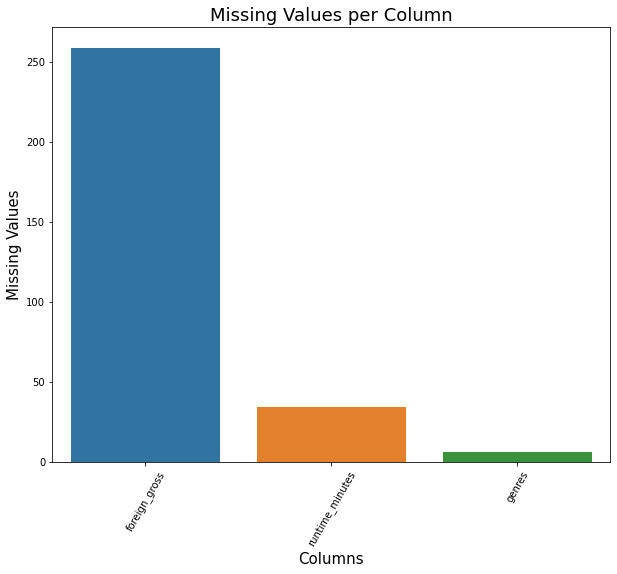

In [310]:
def graph_missing(data):
    """Graphically represent the missing values"""
    fig, axes = plt.subplots(figsize = (10, 8))

    # plot a bargraph
    sns.barplot(x = data.index , y = data["Missing Values"])
    # labeling the axes 
    plt.xlabel("Columns", fontdict={"color": "black", "size": 15})
    # rotating our xticks 
    plt.xticks(rotation = '60')
    # labeling the y axis 
    plt.ylabel("Missing Values", fontdict={"color": "black", "size": 15})
    # title 
    plt.title("Missing Values per Column", fontsize = 18)
    # display
    plt.show()

    # save the plot 
    fig.savefig("missing.png")


graph_missing(missing_data)

The threshold  on how to deal with missing values commonly used is 50% and also depends on the specific column. From the percentages we can replace  the missing values for the specific columns

In [311]:
movies_data.isna().sum()

title                  0
studio                 0
domestic_gross_x       0
foreign_gross        259
year                   0
Unnamed: 0             0
genre_ids              0
id_x                   0
original_language      0
original_title         0
popularity             0
release_date_x         0
vote_average           0
vote_count             0
id_y                   0
release_date_y         0
production_budget      0
domestic_gross_y       0
worldwide_gross        0
movie_id               0
primary_title          0
start_year             0
runtime_minutes       34
genres                 6
averagerating          0
numvotes               0
dtype: int64

worldwide_gross is a summation of domestic_gross and foreign_gross, therefore we can fill the null values on foreign_gross column by subtracting the two columns

In [312]:
#checking the mean and median of runtime_minutes column
print(movies_data['runtime_minutes'].mean())
print(movies_data['runtime_minutes'].median())  
print(movies_data['runtime_minutes'].mode())
print(movies_data['runtime_minutes'].std())

107.17308868501529
105.0
0   100.00
dtype: float64
19.46864560021621


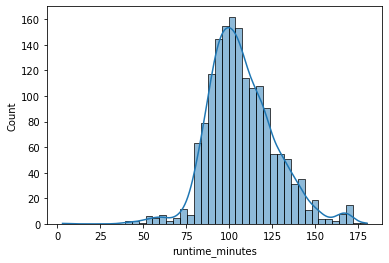

In [313]:
data= movies_data['runtime_minutes']
sns.histplot(data, kde = True);

The distribution of runtime_minutes is almost symmetrical .With the mean and the median values close to one another. We will fill the missing values with the mean so that it won't affect the distribution of the dataset.

In [314]:
#filling the missing value in runtime
mean = movies_data['runtime_minutes'].mean()
movies_data['runtime_minutes'] =movies_data['runtime_minutes'].fillna(mean) 


In [315]:
#checking the mean and median of runtime_minutes column
print(movies_data['foreign_gross'].mean())
print(movies_data['foreign_gross'].median())  
print(movies_data['foreign_gross'].mode())
print(movies_data['foreign_gross'].std())

104438176.58219858
44700000.0
0   41100000.00
dtype: float64
152683177.7708077


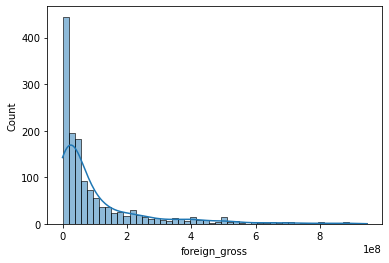

In [316]:
data= movies_data['foreign_gross']
sns.histplot(data, kde = True);

In [317]:
#filling the missing value in runtime
median = movies_data['foreign_gross'].median()
movies_data['foreign_gross'] =movies_data['foreign_gross'].fillna(median) 


In [318]:
#finding the mode 
mode =movies_data['genres'].mode()
mode

0    Drama
dtype: object

In [319]:
#filling the column genres missing values with mode since it's a categorical column
movies_data['genres'].fillna('mode', inplace=True)

In [320]:
movies_data.isna().sum()

title                0
studio               0
domestic_gross_x     0
foreign_gross        0
year                 0
Unnamed: 0           0
genre_ids            0
id_x                 0
original_language    0
original_title       0
popularity           0
release_date_x       0
vote_average         0
vote_count           0
id_y                 0
release_date_y       0
production_budget    0
domestic_gross_y     0
worldwide_gross      0
movie_id             0
primary_title        0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
dtype: int64

All missing values have been removed.
Next we check for outliers and susbset  our data to obtain relevant rows for the analysis.

# outliers

This are extreme values in a dataset.They are the hardest to detect among other data inaccuracies within the data in the sense that they are often of the same type as the other observations. It is easier to detect them if we filter data by columns, so lets first obtain the relevant columns.

In [321]:
relevant_columns =['title', 'studio', 'year', 'popularity', 'vote_average', 'vote_count',  'production_budget', 'domestic_gross_y',   'foreign_gross',   'worldwide_gross', 'movie_id', 'runtime_minutes', 'numvotes', 'genres', 'averagerating' ]
movies_data = movies_data.loc[:, relevant_columns]
movies_data


,title,studio,year,popularity,vote_average,vote_count,production_budget,domestic_gross_y,foreign_gross,worldwide_gross,movie_id,runtime_minutes,numvotes,genres,averagerating
0,Toy Story 3,BV,2010,24.45,7.70,8340,200000000.00,415004880.00,652000000.00,1068879522.00,tt0435761,103.00,682218,"Adventure,Animation,Comedy",8.30
1,Inception,WB,2010,27.92,8.30,22186,160000000.00,292576195.00,535700000.00,835524642.00,tt1375666,148.00,1841066,"Action,Adventure,Sci-Fi",8.80
2,Shrek Forever After,P/DW,2010,15.04,6.10,3843,165000000.00,238736787.00,513900000.00,756244673.00,tt0892791,93.00,167532,"Adventure,Animation,Comedy",6.30
3,The Twilight Saga: Eclipse,Sum.,2010,20.34,6.00,4909,68000000.00,300531751.00,398000000.00,706102828.00,tt1325004,124.00,211733,"Adventure,Drama,Fantasy",5.00
4,Iron Man 2,Par.,2010,28.52,6.80,12368,170000000.00,312433331.00,311500000.00,621156389.00,tt1228705,124.00,657690,"Action,Adventure,Sci-Fi",7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,Mandy,RLJ,2018,0.60,3.50,2,6000000.00,1214525.00,44700000.00,1427656.00,tt6998518,121.00,44378,"Action,Fantasy,Horror",6.60
1665,Mandy,RLJ,2018,16.24,6.20,618,6000000.00,1214525.00,44700000.00,1427656.00,tt4995858,113.00,39,"Drama,Thriller",4.10
1666,Mandy,RLJ,2018,16.24,6.20,618,6000000.00,1214525.00,44700000.00,1427656.00,tt6998518,121.00,44378,"Action,Fantasy,Horror",6.60
1667,Lean on Pete,A24,2018,9.31,6.90,133,8000000.00,1163056.00,44700000.00,2455027.00,tt5340300,121.00,8607,"Adventure,Drama",7.20


1.1000000000000005
False    1621
True       48
Name: vote_average, dtype: int64


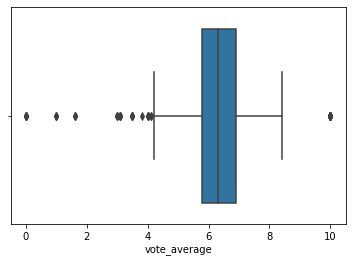

In [322]:
#use iqr to find outliers for numvotes column
q1 = movies_data['vote_average'].quantile(0.25)
q3 = movies_data['vote_average'].quantile(0.75)
iqr = q3-q1
print(iqr)
vote_average_outliers =  (movies_data['vote_average']<q1-(1.5*iqr))|(movies_data['vote_average']>q3+(1.5*iqr))
print(vote_average_outliers.value_counts())
sns.boxplot(movies_data['vote_average']);

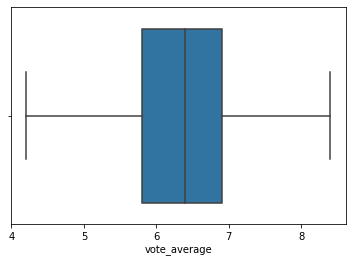

In [323]:
# drop the rows that correspond to the vote_average_outliers
movies_data = movies_data.drop(index=movies_data[vote_average_outliers].index)
sns.boxplot(movies_data['vote_average']);







2394.0
False    1475
True      146
Name: vote_count, dtype: int64


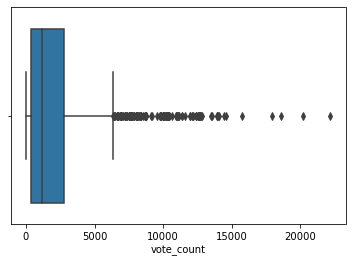

In [324]:
#use iqr to find outliers for vote_count column
q1 = movies_data['vote_count'].quantile(0.25)
q3 = movies_data['vote_count'].quantile(0.75)
iqr = q3-q1
print(iqr)
vote_count_outliers =  (movies_data['vote_count']<q1-(1.5*iqr))|(movies_data['vote_count']>q3+(1.5*iqr))
print(vote_count_outliers.value_counts())
sns.boxplot(movies_data['vote_count']);


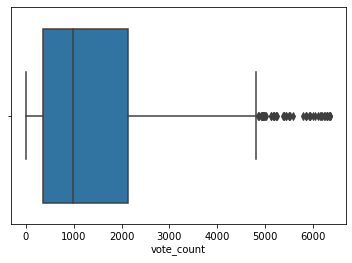

In [325]:
# drop the rows that correspond to the vote_average_outliers
movies_data = movies_data.drop(index=movies_data[vote_count_outliers].index)
sns.boxplot(movies_data['vote_count']);

23.0
False    1438
True       37
Name: runtime_minutes, dtype: int64


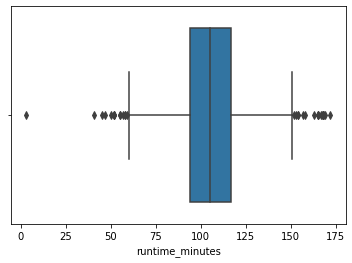

In [326]:
#use iqr to find outliers for runtime_minutes column
q1 = movies_data['runtime_minutes'].quantile(0.25)
q3 = movies_data['runtime_minutes'].quantile(0.75)
iqr = q3-q1
print(iqr)
runtime_minutes_outliers =  (movies_data['runtime_minutes']<q1-(1.5*iqr))|(movies_data['runtime_minutes']>q3+(1.5*iqr))
print(runtime_minutes_outliers.value_counts())
sns.boxplot(movies_data['runtime_minutes']);


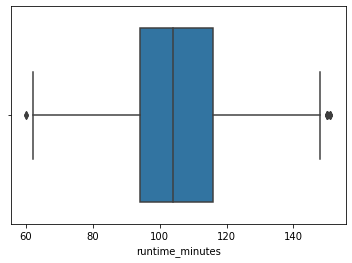

In [327]:
# drop the rows that correspond to the runtime_minutes_outliers
movies_data = movies_data.drop(index=movies_data[runtime_minutes_outliers].index)
sns.boxplot(movies_data['runtime_minutes']);

57026297.75
False    1366
True       72
Name: domestic_gross_y, dtype: int64


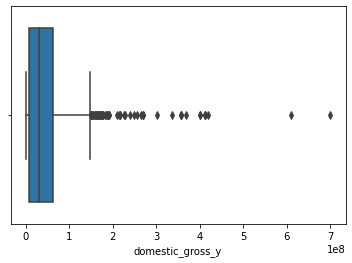

In [328]:
#use iqr to find outliers for domestic_gross_y column
q1 = movies_data['domestic_gross_y'].quantile(0.25)
q3 = movies_data['domestic_gross_y'].quantile(0.75)
iqr = q3-q1
print(iqr)
domestic_gross_y_outliers =  (movies_data['domestic_gross_y']<q1-(1.5*iqr))|(movies_data['domestic_gross_y']>q3+(1.5*iqr))
print(domestic_gross_y_outliers.value_counts())
sns.boxplot(movies_data['domestic_gross_y']);

As much as the above  are categorised as outliers, its practically possible to have such values since they depend on sales, so we will keep all the gross columns outliers and see how the vary in the analysis.Since this is actual data collected from different locations, the outliers may reflect true values of the dataset , so we will keep them and see how they vary in our analysisi.

6.405999999999999
False    1378
True       60
Name: popularity, dtype: int64


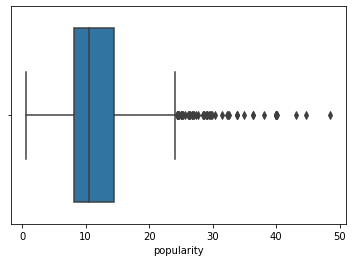

In [329]:
#use iqr to find outliers for popularity column
q1 = movies_data['popularity'].quantile(0.25)
q3 = movies_data['popularity'].quantile(0.75)
iqr = q3-q1
print(iqr)
popularity_outliers =  (movies_data['popularity']<q1-(1.5*iqr))|(movies_data['popularity']>q3+(1.5*iqr))
print(popularity_outliers.value_counts())
sns.boxplot(movies_data['popularity']);

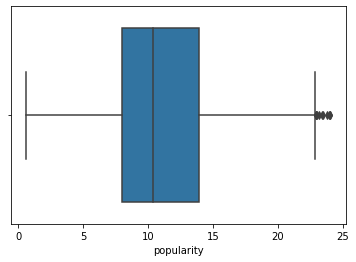

In [330]:
# drop the rows that correspond to the runtime_minutes_outliers
movies_data = movies_data.drop(index=movies_data[popularity_outliers].index)
sns.boxplot(movies_data['popularity']);

102305.0
False    1312
True       66
Name: numvotes, dtype: int64


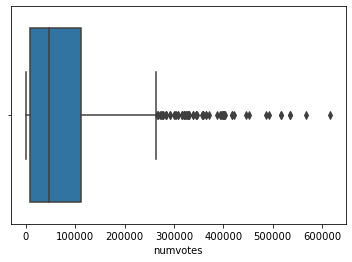

In [331]:
#use iqr to find outliers for numvotes column
q1 = movies_data['numvotes'].quantile(0.25)
q3 = movies_data['numvotes'].quantile(0.75)
iqr = q3-q1
print(iqr)
numvotes_outliers =  (movies_data['numvotes']<q1-(1.5*iqr))|(movies_data['numvotes']>q3+(1.5*iqr))
print(numvotes_outliers.value_counts())
sns.boxplot(movies_data['numvotes']);

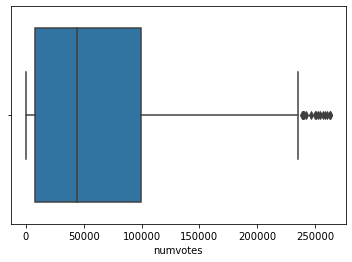

In [332]:
# drop the rows that correspond to the runtime_minutes_outliers
movies_data = movies_data.drop(index=movies_data[numvotes_outliers].index)
sns.boxplot(movies_data['numvotes']);

1.2999999999999998
False    1280
True       32
Name: averagerating, dtype: int64


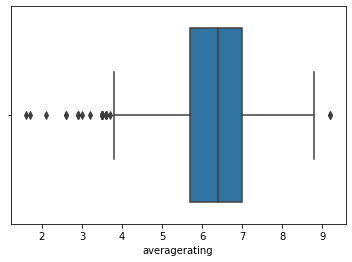

In [333]:
#use iqr to find outliers for numvotes column
q1 = movies_data['averagerating'].quantile(0.25)
q3 = movies_data['averagerating'].quantile(0.75)
iqr = q3-q1
print(iqr)
averagerating_outliers =  (movies_data['averagerating']<q1-(1.5*iqr))|(movies_data['averagerating']>q3+(1.5*iqr))
print(averagerating_outliers.value_counts())
sns.boxplot(movies_data['averagerating']);

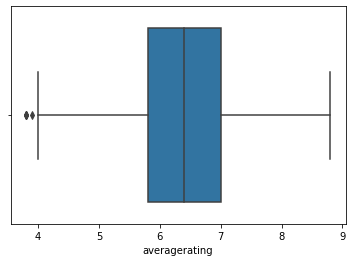

In [334]:
# drop the rows that correspond to the runtime_minutes_outliers
movies_data = movies_data.drop(index=movies_data[averagerating_outliers].index)
sns.boxplot(movies_data['averagerating']);

# Final data

In [335]:
#preview of the first five rows
movies_data.head()

,title,studio,year,popularity,vote_average,vote_count,production_budget,domestic_gross_y,foreign_gross,worldwide_gross,movie_id,runtime_minutes,numvotes,genres,averagerating
2,Shrek Forever After,P/DW,2010,15.04,6.10,3843,165000000.00,238736787.00,513900000.00,756244673.00,tt0892791,93.00,167532,"Adventure,Animation,Comedy",6.30
3,The Twilight Saga: Eclipse,Sum.,2010,20.34,6.00,4909,68000000.00,300531751.00,398000000.00,706102828.00,tt1325004,124.00,211733,"Adventure,Drama,Fantasy",5.00
8,The Chronicles of Narnia: The Voyage of the Da...,Fox,2010,17.38,6.30,3196,155000000.00,104386950.00,311300000.00,418186950.00,tt0980970,113.00,129663,"Adventure,Family,Fantasy",6.30
9,The Karate Kid,Sony,2010,12.26,6.30,3140,40000000.00,176591618.00,182500000.00,351774938.00,tt1155076,140.00,146401,"Action,Drama,Family",6.20
10,The Karate Kid,Sony,2010,12.26,6.30,3140,8000000.00,90815558.00,182500000.00,90815558.00,tt1155076,140.00,146401,"Action,Drama,Family",6.20


In [336]:
#preview of the last five rows
movies_data.tail()

,title,studio,year,popularity,vote_average,vote_count,production_budget,domestic_gross_y,foreign_gross,worldwide_gross,movie_id,runtime_minutes,numvotes,genres,averagerating
1662,Bilal: A New Breed of Hero,VE,2018,2.71,6.80,54,30000000.00,490973.00,1700000.00,648599.00,tt3576728,105.00,16854,"Action,Adventure,Animation",8.00
1665,Mandy,RLJ,2018,16.24,6.20,618,6000000.00,1214525.00,44700000.00,1427656.00,tt4995858,113.00,39,"Drama,Thriller",4.10
1666,Mandy,RLJ,2018,16.24,6.20,618,6000000.00,1214525.00,44700000.00,1427656.00,tt6998518,121.00,44378,"Action,Fantasy,Horror",6.60
1667,Lean on Pete,A24,2018,9.31,6.90,133,8000000.00,1163056.00,44700000.00,2455027.00,tt5340300,121.00,8607,"Adventure,Drama",7.20
1668,Lean on Pete,A24,2018,9.31,6.90,133,8000000.00,1163056.00,44700000.00,2455027.00,tt5340300,121.00,8607,"Adventure,Drama",7.20


In [337]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1280 entries, 2 to 1668
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1280 non-null   object 
 1   studio             1280 non-null   object 
 2   year               1280 non-null   int64  
 3   popularity         1280 non-null   float64
 4   vote_average       1280 non-null   float64
 5   vote_count         1280 non-null   int64  
 6   production_budget  1280 non-null   float64
 7   domestic_gross_y   1280 non-null   float64
 8   foreign_gross      1280 non-null   float64
 9   worldwide_gross    1280 non-null   float64
 10  movie_id           1280 non-null   object 
 11  runtime_minutes    1280 non-null   float64
 12  numvotes           1280 non-null   int64  
 13  genres             1280 non-null   object 
 14  averagerating      1280 non-null   float64
dtypes: float64(8), int64(3), object(4)
memory usage: 160.0+ KB


In [338]:
#renaming foreign_gross_y column
movies_data=movies_data.rename(columns ={'domestic_gross_y':'domestic_gross'})
movies_data

,title,studio,year,popularity,vote_average,vote_count,production_budget,domestic_gross,foreign_gross,worldwide_gross,movie_id,runtime_minutes,numvotes,genres,averagerating
2,Shrek Forever After,P/DW,2010,15.04,6.10,3843,165000000.00,238736787.00,513900000.00,756244673.00,tt0892791,93.00,167532,"Adventure,Animation,Comedy",6.30
3,The Twilight Saga: Eclipse,Sum.,2010,20.34,6.00,4909,68000000.00,300531751.00,398000000.00,706102828.00,tt1325004,124.00,211733,"Adventure,Drama,Fantasy",5.00
8,The Chronicles of Narnia: The Voyage of the Da...,Fox,2010,17.38,6.30,3196,155000000.00,104386950.00,311300000.00,418186950.00,tt0980970,113.00,129663,"Adventure,Family,Fantasy",6.30
9,The Karate Kid,Sony,2010,12.26,6.30,3140,40000000.00,176591618.00,182500000.00,351774938.00,tt1155076,140.00,146401,"Action,Drama,Family",6.20
10,The Karate Kid,Sony,2010,12.26,6.30,3140,8000000.00,90815558.00,182500000.00,90815558.00,tt1155076,140.00,146401,"Action,Drama,Family",6.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,Bilal: A New Breed of Hero,VE,2018,2.71,6.80,54,30000000.00,490973.00,1700000.00,648599.00,tt3576728,105.00,16854,"Action,Adventure,Animation",8.00
1665,Mandy,RLJ,2018,16.24,6.20,618,6000000.00,1214525.00,44700000.00,1427656.00,tt4995858,113.00,39,"Drama,Thriller",4.10
1666,Mandy,RLJ,2018,16.24,6.20,618,6000000.00,1214525.00,44700000.00,1427656.00,tt6998518,121.00,44378,"Action,Fantasy,Horror",6.60
1667,Lean on Pete,A24,2018,9.31,6.90,133,8000000.00,1163056.00,44700000.00,2455027.00,tt5340300,121.00,8607,"Adventure,Drama",7.20


In [339]:
#summary statistics 
movies_data.describe()

,year,popularity,vote_average,vote_count,production_budget,domestic_gross,foreign_gross,worldwide_gross,runtime_minutes,numvotes,averagerating
count,1280.00,1280.00,1280.00,1280.00,1280.00,1280.00,1280.00,1280.00,1280.00,1280.00,1280.00
mean,2013.88,10.64,6.26,1280.50,35029902.58,39712259.52,59454966.31,91249318.26,104.93,65328.33,6.33
std,2.49,4.80,0.74,1232.76,40879412.69,48856487.55,83071186.52,126585766.12,15.49,64414.97,0.88
min,2010.00,0.60,4.30,1.00,50000.00,0.00,600.00,0.00,60.00,5.00,3.80
25%,2012.00,7.91,5.80,312.00,8000000.00,4457078.50,12150000.00,12607454.25,94.00,10009.00,5.80
50%,2014.00,10.26,6.20,894.50,20000000.00,25961885.50,44700000.00,48966869.00,104.00,45269.00,6.40
75%,2016.00,13.72,6.80,1918.00,43250000.00,55176399.75,58400000.00,112942221.00,114.00,101556.50,7.00
max,2018.00,24.06,8.30,6365.00,275000000.00,412563408.00,875700000.00,1272469910.00,151.00,263136.00,8.80


# External Data Validation and relevance

# Validation

This data is valid since it is raw data collected from different different location and then combined in one dataframe.It relevance comes from the fact that it's a combination of only columns relevant for the analysis

# Accuracy of the data

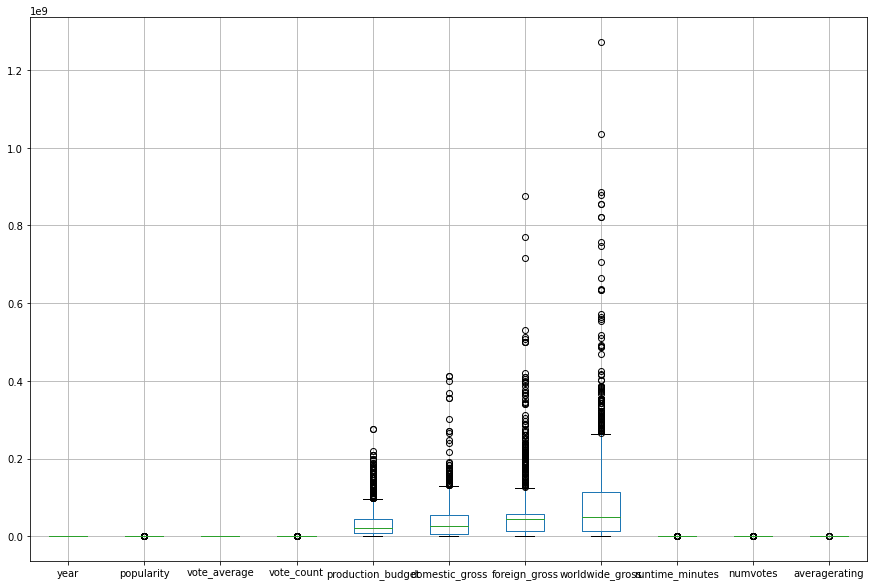

In [340]:
#checking for outliers
plt.figure(figsize = (15, 10))
movies_data.boxplot()
plt.show()

# Explanatory Data Analysis

Inspect the distributions of individual columns = univariate analysis
Subsets of columns =multivariate analysis
Correlations 


# Univariate analysis

Lets first see how each column looks like on its own

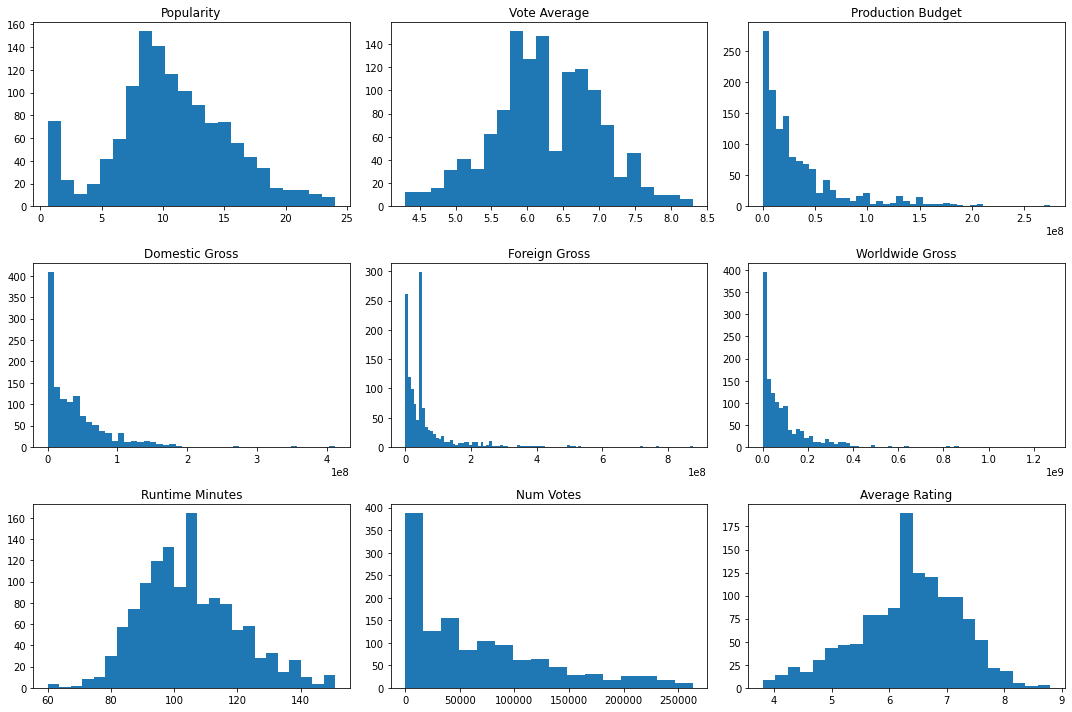

In [341]:
# Create a 3x3 grid of subplots with a specified figure size
fig, axes = plt.subplots(figsize=(15,10), ncols=3, nrows=3)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each histogram on a separate subplot
axes[0].hist(movies_data['popularity'], bins = 'auto')
axes[1].hist(movies_data['vote_average'], bins = 'auto')
axes[2].hist(movies_data['production_budget'], bins = 'auto')
axes[3].hist(movies_data['domestic_gross'] , bins = 'auto')
axes[4].hist(movies_data['foreign_gross'], bins = 'auto')
axes[5].hist(movies_data['worldwide_gross'], bins = 'auto')
axes[6].hist(movies_data['runtime_minutes'], bins = 'auto')
axes[7].hist(movies_data['numvotes'], bins = 'auto')
axes[8].hist(movies_data['averagerating'], bins = 'auto')

# Add titles to each subplot
axes[0].set_title('Popularity')
axes[1].set_title('Vote Average')
axes[2].set_title('Production Budget')
axes[3].set_title('Domestic Gross')
axes[4].set_title('Foreign Gross')
axes[5].set_title('Worldwide Gross')
axes[6].set_title('Runtime Minutes')
axes[7].set_title('Num Votes')
axes[8].set_title('Average Rating')

# Adjust the spacing between subplots
fig.tight_layout()

# Display the figure
plt.show()


# Multivariate Analysis

We will try and understand the relationships between two or more variables  and their results in relationship to the project. we will do this by analysing our questions
.


#  1. Should microsoft enter into movie production

Since microsoft wants to try a new adventure we  need to know if they are going to loose all their money through losses or make great profits and it becomes a good investment
Lets first create a new column to obtain profit values.

In [348]:
#creating  a new column
movies_data['profit']=gross_data['worldwide_gross'] - gross_data['production_budget']
movies_data


,title,studio,year,popularity,vote_average,vote_count,production_budget,domestic_gross,foreign_gross,worldwide_gross,movie_id,runtime_minutes,numvotes,genres,averagerating,profit
2,Shrek Forever After,P/DW,2010,15.04,6.10,3843,165000000.00,238736787.00,513900000.00,756244673.00,tt0892791,93.00,167532,"Adventure,Animation,Comedy",6.30,591244673.00
3,The Twilight Saga: Eclipse,Sum.,2010,20.34,6.00,4909,68000000.00,300531751.00,398000000.00,706102828.00,tt1325004,124.00,211733,"Adventure,Drama,Fantasy",5.00,638102828.00
8,The Chronicles of Narnia: The Voyage of the Da...,Fox,2010,17.38,6.30,3196,155000000.00,104386950.00,311300000.00,418186950.00,tt0980970,113.00,129663,"Adventure,Family,Fantasy",6.30,263186950.00
9,The Karate Kid,Sony,2010,12.26,6.30,3140,40000000.00,176591618.00,182500000.00,351774938.00,tt1155076,140.00,146401,"Action,Drama,Family",6.20,311774938.00
10,The Karate Kid,Sony,2010,12.26,6.30,3140,8000000.00,90815558.00,182500000.00,90815558.00,tt1155076,140.00,146401,"Action,Drama,Family",6.20,82815558.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,Bilal: A New Breed of Hero,VE,2018,2.71,6.80,54,30000000.00,490973.00,1700000.00,648599.00,tt3576728,105.00,16854,"Action,Adventure,Animation",8.00,-29351401.00
1665,Mandy,RLJ,2018,16.24,6.20,618,6000000.00,1214525.00,44700000.00,1427656.00,tt4995858,113.00,39,"Drama,Thriller",4.10,-4572344.00
1666,Mandy,RLJ,2018,16.24,6.20,618,6000000.00,1214525.00,44700000.00,1427656.00,tt6998518,121.00,44378,"Action,Fantasy,Horror",6.60,-4572344.00
1667,Lean on Pete,A24,2018,9.31,6.90,133,8000000.00,1163056.00,44700000.00,2455027.00,tt5340300,121.00,8607,"Adventure,Drama",7.20,-5544973.00


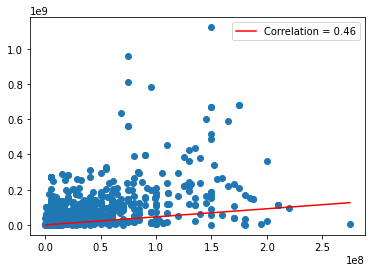

In [353]:
#filtering the data
movies_data = movies_data[(movies_data['production_budget'] > 0) & (movies_data['profit'] > 0)]

x = movies_data['production_budget']
y = movies_data['profit']
# Calculate the correlation coefficient
corr = np.corrcoef(x, y)[0, 1]

# Create a scatter plot
plt.scatter(x, y)

# Add a correlation line
x_line = np.array([min(x), max(x)])
y_line = corr * x_line
plt.plot(x_line, y_line, color='red', label=f'Correlation = {corr:.2f}')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<AxesSubplot:xlabel='production_budget', ylabel='profit'>

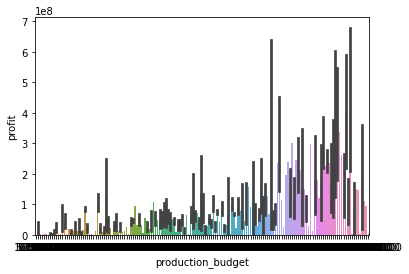

In [357]:
x = movies_data['production_budget']
y = movies_data['profit']
sns.barplot(x,y)

# Results

The correlation coefficient between production budget and profit is 0.46.A moderate positive correlation
Correlation measures the association but doesn't show causation or an association of a third factor.
This show that their is a positive relationship.
From this analysis microsoft should enter into movie creation.
For better profit we need to find which specific movies genres are making great profits,which movies are the most profitable

# 2.What are the most profitable movies

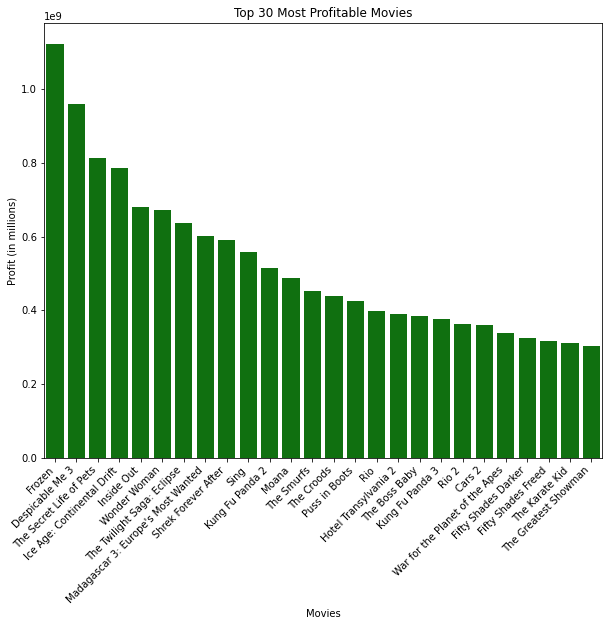

In [376]:
# sort movies_data by profit in descending order
movies_data_sorted = movies_data.sort_values('profit', ascending=False)

# select the top 30 most profitable movies
top_movies = movies_data_sorted.head(30)

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=top_movies['title'], y=top_movies['profit'], color='green')

# set chart title and axis labels
ax.set_title('Top 30 Most Profitable Movies')
ax.set_xlabel('Movies')
ax.set_ylabel('Profit (in millions)')

# rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# show the plot
plt.show()


Lets break this down and find the success of the movies under different scenarios